### Title:Uber & Lyft Cab prices Analysis

In [ ]:
Name: Allu Pranaya
RollNo: 2211CS010016
Section: S1-04

In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, corr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize Spark
spark = SparkSession.builder.appName("CabRidesAnalysis").getOrCreate()


In [6]:
df = spark.read.csv("cab_rides.csv", header=True, inferSchema=True)
df.show(5)   # Preview first 5 rows
df.printSchema()  # Check schema


+--------+--------+----------+-------------+----------------+-----+----------------+--------------------+------------+------------+
|distance|cab_type|time_stamp|  destination|          source|price|surge_multiplier|                  id|  product_id|        name|
+--------+--------+----------+-------------+----------------+-----+----------------+--------------------+------------+------------+
|    0.44|    Lyft|1.54495E12|North Station|Haymarket Square|  5.0|             1.0|424553bb-7174-41e...|   lyft_line|      Shared|
|    0.44|    Lyft|1.54328E12|North Station|Haymarket Square| 11.0|             1.0|4bd23055-6827-41c...|lyft_premier|         Lux|
|    0.44|    Lyft|1.54337E12|North Station|Haymarket Square|  7.0|             1.0|981a3613-77af-462...|        lyft|        Lyft|
|    0.44|    Lyft|1.54355E12|North Station|Haymarket Square| 26.0|             1.0|c2d88af2-d278-4bf...| lyft_luxsuv|Lux Black XL|
|    0.44|    Lyft|1.54346E12|North Station|Haymarket Square|  9.0|         

In [7]:
# Summary statistics
df.describe().show()


+-------+------------------+--------+--------------------+-----------+--------+------------------+-------------------+--------------------+--------------------+-----+
|summary|          distance|cab_type|          time_stamp|destination|  source|             price|   surge_multiplier|                  id|          product_id| name|
+-------+------------------+--------+--------------------+-----------+--------+------------------+-------------------+--------------------+--------------------+-----+
|  count|              2093|    2093|                2093|       2093|    2093|              1920|               2093|                2093|                2093| 2093|
|   mean|2.1312326803631096|    NULL|1.544018408982322E12|       NULL|    NULL|16.398177083333334|  1.010630673674152|                NULL|                NULL| NULL|
| stddev|1.0509020571359042|    NULL|  6.86041100059527E8|       NULL|    NULL| 9.083548960021902|0.08311274424308637|                NULL|                NULL| NULL

In [8]:
numeric_cols = ['distance', 'time_stamp', 'price', 'surge_multiplier']

# Print correlations
for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 != col2:
            corr_value = df.stat.corr(col1, col2)
            print(f"Correlation between {col1} and {col2}: {corr_value:.2f}")


Correlation between distance and time_stamp: 0.02
Correlation between distance and price: 0.28
Correlation between distance and surge_multiplier: 0.02
Correlation between time_stamp and distance: 0.02
Correlation between time_stamp and price: -0.00
Correlation between time_stamp and surge_multiplier: -0.02
Correlation between price and distance: 0.28
Correlation between price and time_stamp: -0.00
Correlation between price and surge_multiplier: 0.20
Correlation between surge_multiplier and distance: 0.02
Correlation between surge_multiplier and time_stamp: -0.02
Correlation between surge_multiplier and price: 0.20


In [9]:
# Convert PySpark DataFrame to Pandas
pdf = df.toPandas()


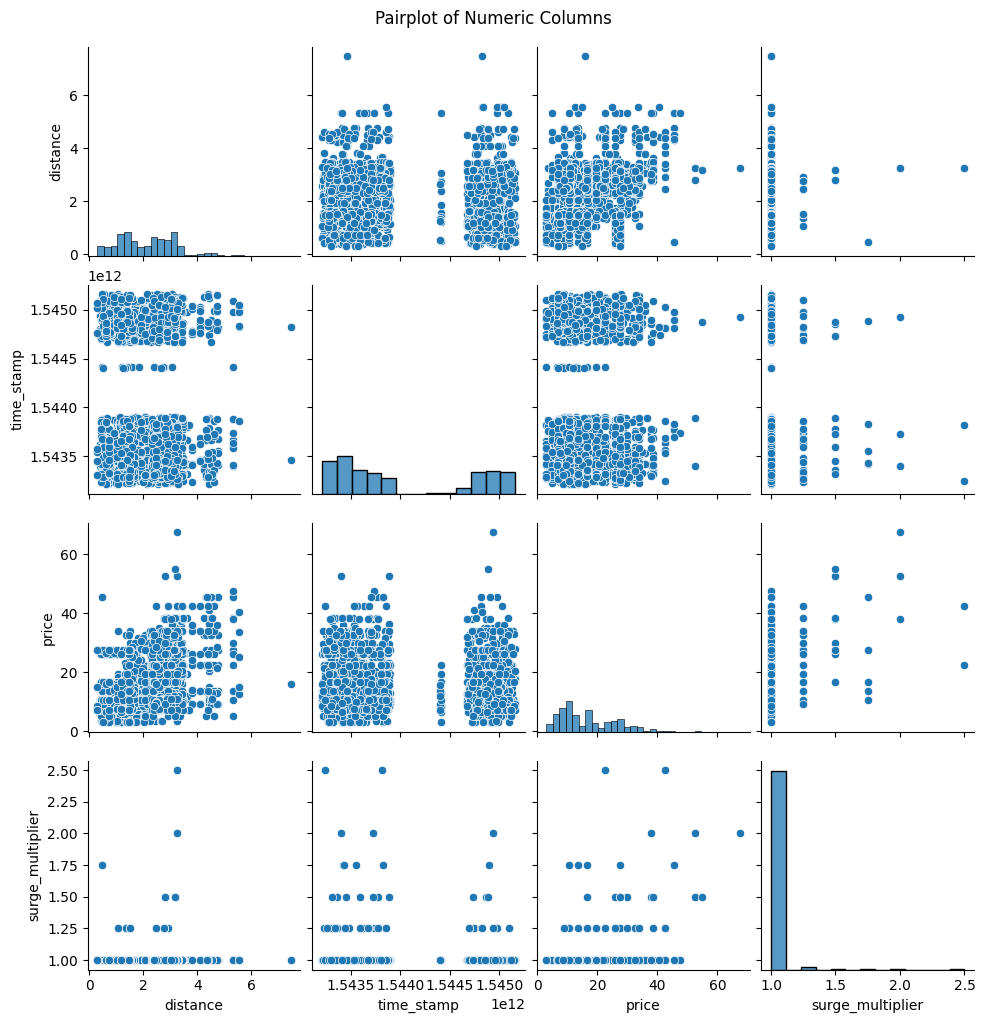

In [10]:
sns.pairplot(pdf[numeric_cols])
plt.suptitle("Pairplot of Numeric Columns", y=1.02)
plt.show()


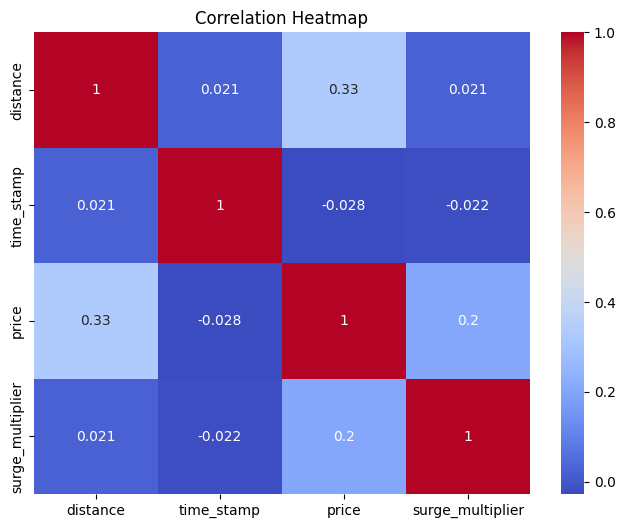

In [11]:
corr_matrix = pdf[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


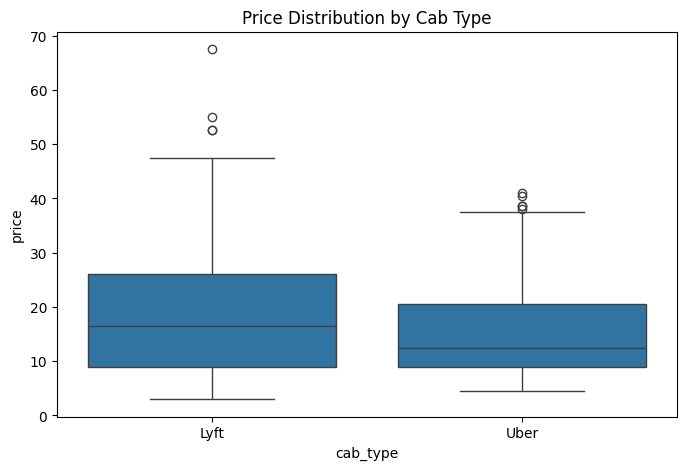

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cab_type', y='price', data=pdf)
plt.title("Price Distribution by Cab Type")
plt.show()


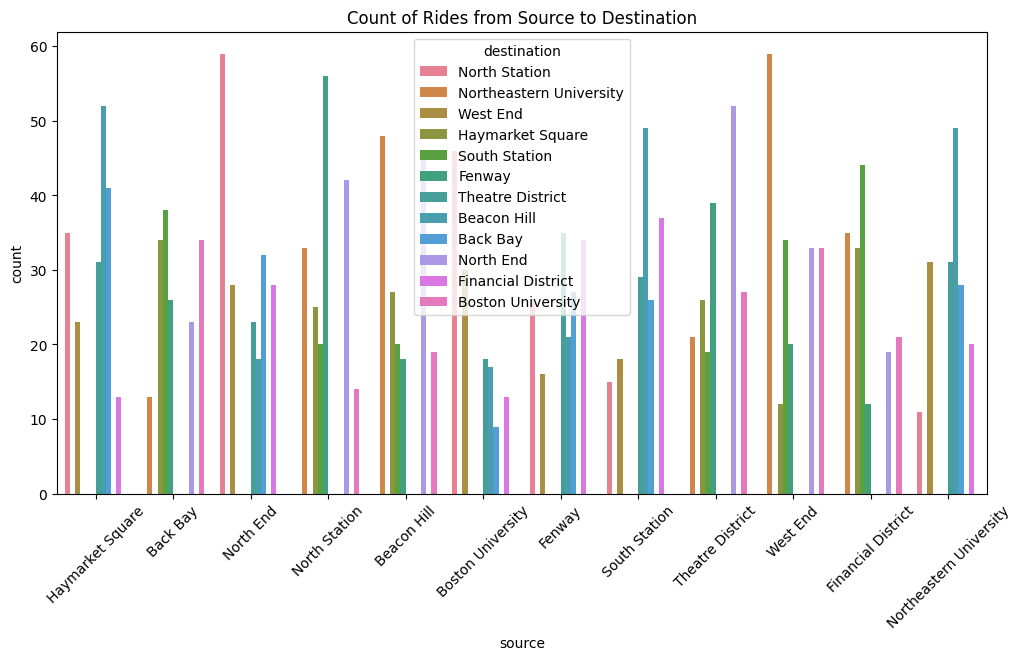

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='source', hue='destination', data=pdf)
plt.xticks(rotation=45)
plt.title("Count of Rides from Source to Destination")
plt.show()


In [14]:
# Average price by cab type
avg_price = pdf.groupby('cab_type')['price'].mean()
print("Average Price by Cab Type:")
print(avg_price)

# Most popular source
popular_source = pdf['source'].value_counts().idxmax()
print(f"Most popular source location: {popular_source}")


Average Price by Cab Type:
cab_type
Lyft    17.322598
Uber    15.554781
Name: price, dtype: float64
Most popular source location: Haymarket Square


In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, max, min, count
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

spark = SparkSession.builder.appName("CabRidesAnalysis2").getOrCreate()


In [17]:
df = spark.read.csv("cab_rides.csv", header=True, inferSchema=True)
df.show(5)
df.printSchema()


+--------+--------+----------+-------------+----------------+-----+----------------+--------------------+------------+------------+
|distance|cab_type|time_stamp|  destination|          source|price|surge_multiplier|                  id|  product_id|        name|
+--------+--------+----------+-------------+----------------+-----+----------------+--------------------+------------+------------+
|    0.44|    Lyft|1.54495E12|North Station|Haymarket Square|  5.0|             1.0|424553bb-7174-41e...|   lyft_line|      Shared|
|    0.44|    Lyft|1.54328E12|North Station|Haymarket Square| 11.0|             1.0|4bd23055-6827-41c...|lyft_premier|         Lux|
|    0.44|    Lyft|1.54337E12|North Station|Haymarket Square|  7.0|             1.0|981a3613-77af-462...|        lyft|        Lyft|
|    0.44|    Lyft|1.54355E12|North Station|Haymarket Square| 26.0|             1.0|c2d88af2-d278-4bf...| lyft_luxsuv|Lux Black XL|
|    0.44|    Lyft|1.54346E12|North Station|Haymarket Square|  9.0|         

In [18]:
avg_price_cab = df.groupBy("cab_type").agg(avg("price").alias("avg_price"))
avg_price_cab.show()


+--------+------------------+
|cab_type|         avg_price|
+--------+------------------+
|    Lyft| 17.32259825327511|
|    Uber|15.554780876494023|
+--------+------------------+



In [19]:
max_distance_cab = df.groupBy("cab_type").agg(max("distance").alias("max_distance"))
max_distance_cab.show()


+--------+------------+
|cab_type|max_distance|
+--------+------------+
|    Lyft|        5.33|
|    Uber|        7.46|
+--------+------------+



In [20]:
rides_per_source = df.groupBy("source").agg(count("*").alias("num_rides"))
rides_per_source.show()


+--------------------+---------+
|              source|num_rides|
+--------------------+---------+
|  Financial District|      164|
|Northeastern Univ...|      170|
|           North End|      188|
|   Boston University|      133|
|       North Station|      190|
|            Back Bay|      168|
|    Theatre District|      184|
|       South Station|      174|
|              Fenway|      159|
|    Haymarket Square|      195|
|            West End|      191|
|         Beacon Hill|      177|
+--------------------+---------+



In [21]:
avg_surge_destination = df.groupBy("destination").agg(avg("surge_multiplier").alias("avg_surge"))
avg_surge_destination.show()


+--------------------+------------------+
|         destination|         avg_surge|
+--------------------+------------------+
|  Financial District|               1.0|
|Northeastern Univ...|               1.0|
|           North End|               1.0|
|   Boston University| 1.008445945945946|
|       North Station|               1.0|
|            Back Bay|1.0368098159509203|
|    Theatre District|1.0224550898203593|
|       South Station|1.0214285714285714|
|              Fenway|1.0146198830409356|
|    Haymarket Square|1.0079617834394905|
|            West End|1.0256849315068493|
|         Beacon Hill|               1.0|
+--------------------+------------------+



In [22]:
pdf_avg_price = avg_price_cab.toPandas()
pdf_max_distance = max_distance_cab.toPandas()
pdf_rides_source = rides_per_source.toPandas()
pdf_avg_surge = avg_surge_destination.toPandas()


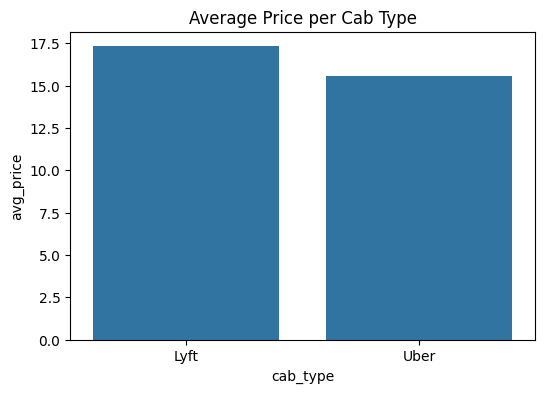

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x='cab_type', y='avg_price', data=pdf_avg_price)
plt.title("Average Price per Cab Type")
plt.show()


C:\Users\Harini\AppData\Local\Temp\ipykernel_9356\2514970801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_rides', y='source', data=pdf_rides_source, palette="viridis")


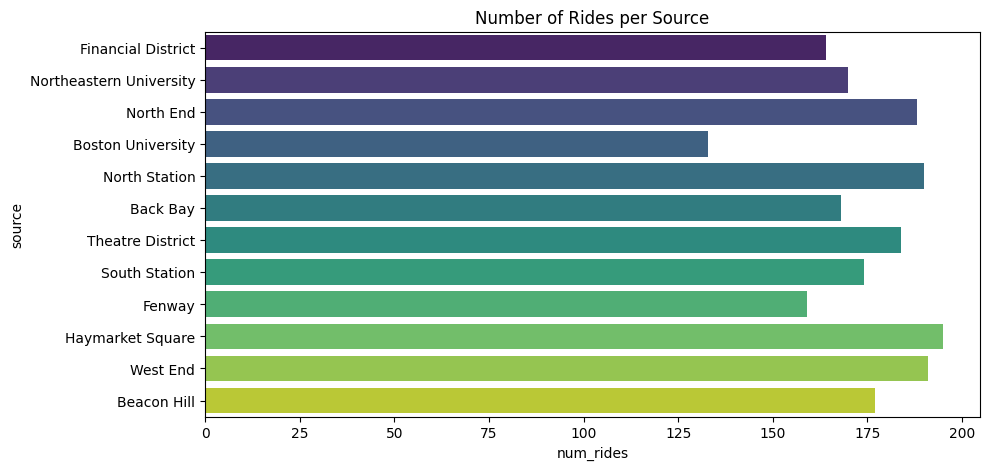

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='num_rides', y='source', data=pdf_rides_source, palette="viridis")
plt.title("Number of Rides per Source")
plt.show()


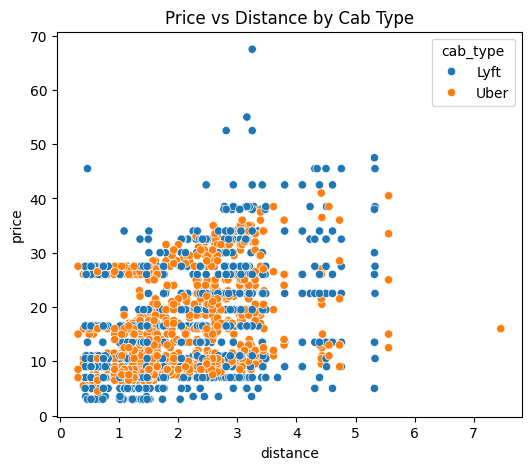

In [25]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='distance', y='price', hue='cab_type', data=df.toPandas())
plt.title("Price vs Distance by Cab Type")
plt.show()


In [27]:
# Most expensive cab type on average
expensive_cab = pdf_avg_price.loc[pdf_avg_price['avg_price'].idxmax(), 'cab_type']
print(f"The most expensive cab type on average is: {expensive_cab}")

# Source with highest number of rides
top_source = pdf_rides_source.loc[pdf_rides_source['num_rides'].idxmax(), 'source']
print(f"The source with highest number of rides is: {top_source}")

# Destination with highest average surge
top_surge_destination = pdf_avg_surge.loc[pdf_avg_surge['avg_surge'].idxmax(), 'destination']
print(f"The destination with highest average surge multiplier is: {top_surge_destination}")


The most expensive cab type on average is: Lyft
The source with highest number of rides is: Haymarket Square
The destination with highest average surge multiplier is: Back Bay
